#Data Acquisition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
%%capture
pip install mne

In [19]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
cd '/content/drive/MyDrive/Final Year Project/Datasets/S01_ME/'

/content/drive/MyDrive/Final Year Project/Datasets/S01_ME


In [23]:
import os
files = os.listdir("/content/drive/MyDrive/Final Year Project/Datasets/S01_ME/")
files[0]

'motorexecution_subject1_run1.gdf'

In [28]:
%%capture
from mne.io import concatenate_raws, read_raw_gdf

raws = [read_raw_gdf(f, preload = True, exclude=['eog-r', 'eog-m','eog-l', 'thumb_near', 'thumb_far', 'thumb_index', 'index_near','index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring','ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far','thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX','handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ','ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow','ProSupination', 'Wrist', 'GripPressure']) for f in files]

#Combine all loaded runs
raw_data = concatenate_raws(raws)

event_id = {'1536': 1, '1537': 2, '1538': 3, '1539': 4, '1540': 5, '1541': 6, '1542': 7}

events = mne.events_from_annotations(raw_data, event_id=event_id)[0]
epochs = mne.Epochs(raw_data, events, event_id=event_id)

In [21]:
pd.set_option('display.max_columns', None)

In [29]:
df = epochs.to_data_frame()

Using data from preloaded Raw for 420 events and 359 original time points ...
0 bad epochs dropped


In [30]:
df.sample(5)

,time,condition,epoch,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,eeg-9,eeg-10,eeg-11,eeg-12,eeg-13,eeg-14,eeg-15,eeg-16,eeg-17,eeg-18,eeg-19,eeg-20,eeg-21,eeg-22,eeg-23,eeg-24,eeg-25,eeg-26,eeg-27,eeg-28,eeg-29,eeg-30,eeg-31,eeg-32,eeg-33,eeg-34,eeg-35,eeg-36,eeg-37,eeg-38,eeg-39,eeg-40,eeg-41,eeg-42,eeg-43,eeg-44,eeg-45,eeg-46,eeg-47,eeg-48,eeg-49,eeg-50,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
49973,-0.058594,1542,139,2.641696e+06,2.460098e+06,-1.379688e+06,-3.837324e+06,1.020579e+06,6.744174e+06,1.176265e+06,-5.176113e+05,-4.130883e+06,-5.751280e+06,2.342925e+06,1.516636e+07,7.298686e+06,1.016540e+06,-4.787839e+06,-4.659384e+06,-2.718944e+06,1.347410e+06,2.099391e+06,4.823681e+06,5.923067e+06,2.578981e+06,-9.628494e+06,-2.886942e+06,-1.299113e+06,3.311163e+06,5.463199e+06,7.462324e+06,-1.162517e+06,-7.248014e+06,-5.474576e+06,-6.966157e+06,-1.834065e+06,2.680529e+06,6.996544e+06,4.024741e+06,3.560838e+06,-5.360676e+06,-4.956320e+06,-5.120243e+06,1.238224e+06,8.028576e+06,6.620729e+06,4.637205e+06,-6.162647e+06,-5.769012e+06,-3.808260e+06,-2.807219e+06,8.893905e+06,2.530515e+06,-8.708818e+06,-8.587398e+06,-2.442151e+06,-6.904961e+05,2.980898e+06,-5.356744e+06,-1.181238e+07,-6.365765e+06,-1.189230e+06,-1.076523e+07,-5.012994e+06
37212,0.259766,1537,103,6.815235e+06,5.503227e+06,4.356951e+06,9.391189e+06,7.063392e+06,7.574319e+06,5.527512e+06,5.544291e+06,5.737288e+06,6.853184e+06,6.405584e+06,1.175509e+07,2.808252e+06,6.775637e+06,2.454738e+06,3.083136e+06,9.034594e+06,6.291897e+06,9.563702e+06,4.063888e+06,-3.452812e+04,-2.240258e+06,-5.636201e+06,1.157506e+06,6.725530e+06,3.033886e+05,4.645343e+06,5.046602e+06,-1.647993e+06,-5.843393e+06,-2.105679e+06,4.760001e+06,2.691759e+06,2.032505e+06,4.594602e+06,-1.808978e+06,5.141175e+04,-4.198662e+06,-4.664552e+06,3.782784e+06,1.017048e+07,9.974413e+05,3.016561e+06,-1.157310e+06,-1.106068e+06,-7.774706e+05,-4.342692e+06,9.110813e+06,3.291170e+06,-4.549114e+06,-1.606679e+06,-2.126282e+06,-3.524614e+06,4.506592e+06,-2.220471e+05,-4.411796e+06,-3.073806e+06,-8.241877e+06,3.427081e+06,-5.144009e+06,-1.628600e+06
145689,0.375000,1537,405,1.927326e+07,2.080217e+07,1.632006e+07,3.328831e+07,3.032416e+07,3.153557e+06,1.937447e+07,1.984942e+07,2.130519e+07,2.240827e+07,2.339728e+07,5.531923e+06,9.580557e+06,1.258115e+07,1.897294e+07,1.851605e+07,1.925608e+07,1.200030e+07,-1.825328e+06,2.016175e+06,1.840247e+07,1.925643e+07,3.286386e+07,1.523456e+07,5.598581e+06,-4.642554e+06,6.464939e+05,5.137006e+06,3.475581e+06,2.079687e+06,1.099221e+07,4.854047e+06,2.538906e+06,2.504632e+06,-8.953585e+05,1.095907e+06,-2.585452e+06,2.874329e+06,-2.802343e+06,-6.413366e+06,-1.805409e+07,-1.504721e+07,-2.203824e+06,2.573292e+06,-5.882730e+06,-1.220714e+07,3.522030e+06,-1.810390e+07,-1.583199e+07,-1.941738e+07,-9.428007e+06,-1.045962e+07,-1.094164e+07,-1.756316e+07,-1.666022e+07,-9.917888e+06,-1.387208e+07,-1.521709e+07,-1.294247e+07,-1.816298e+07,-2.128887e+07
141218,0.056641,1541,393,-1.691868e+07,-1.485202e+07,-1.280837e+07,-4.164138e+06,-2.756348e+06,-2.125920e+07,-1.343546e+07,-1.449896e+07,-1.052157e+07,-6.819938e+06,-4.214396e+06,-2.212908e+07,-1.721273e+07,-1.270949e+07,-1.058637e+07,-8.875175e+06,-8.091000e+06,-1.250210e+07,-1.323184e+07,-9.456910e+06,-8.539465e+06,-3.233880e+06,-2.191318e+07,-4.504366e+06,-3.169988e+05,1.339526e+05,-1.367680e+07,-6.195483e+06,4.898765e+05,5.197199e+06,7.852487e+06,5.925238e+06,-3.747409e+06,-1.938879e+07,-1.034535e+07,-5.128811e+06,-2.070490e+06,1.385230e+06,3.816655e+06,2.602613e+06,-6.963614e+06,-8.641616e+06,-8.399018e+06,-6.366740e+06,6.777012e+06,8.569464e+06,5.512627e+06,1.370209e+07,-3.595224e+06,1.762814e+05,1.070142e+07,1.028720e+07,1.065876e+07,1.061847e+07,6.423553e+05,2.643081e+06,7.114988e+06,1.016158e+07,1.223012e+07,5.688311e+06,1.168270e+07
118650,0.152344,1542,330,-6.123379e+05,1.253977e+06,-1.824811e+06,-2.260756e+06,4.600211e+06,3.312263e+06,2.147494e+06,2.006836e+05,3.418021e+06,3.836165e+06,9.948038e+06,-

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150780 entries, 0 to 150779
Data columns (total 64 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       150780 non-null  float64
 1   condition  150780 non-null  object 
 2   epoch      150780 non-null  int64  
 3   eeg-0      150780 non-null  float64
 4   eeg-1      150780 non-null  float64
 5   eeg-2      150780 non-null  float64
 6   eeg-3      150780 non-null  float64
 7   eeg-4      150780 non-null  float64
 8   eeg-5      150780 non-null  float64
 9   eeg-6      150780 non-null  float64
 10  eeg-7      150780 non-null  float64
 11  eeg-8      150780 non-null  float64
 12  eeg-9      150780 non-null  float64
 13  eeg-10     150780 non-null  float64
 14  eeg-11     150780 non-null  float64
 15  eeg-12     150780 non-null  float64
 16  eeg-13     150780 non-null  float64
 17  eeg-14     150780 non-null  float64
 18  eeg-15     150780 non-null  float64
 19  eeg-16     150780 non-n

In [32]:
df["condition"]  = df["condition"].replace(event_id)

In [33]:
df.corr()["condition"]

time         7.516126e-17
condition    1.000000e+00
epoch        3.760643e-03
eeg-0        3.713400e-02
eeg-1        3.755051e-02
                 ...     
eeg-56       4.341851e-02
eeg-57       4.483570e-02
eeg-58       4.616428e-02
eeg-59       4.593332e-02
eeg-60       4.226221e-02
Name: condition, Length: 64, dtype: float64

In [34]:
for i in df.isnull().sum():
  if i>0:
    print(i)

In [35]:
df.describe()

,time,condition,epoch,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,eeg-9,eeg-10,eeg-11,eeg-12,eeg-13,eeg-14,eeg-15,eeg-16,eeg-17,eeg-18,eeg-19,eeg-20,eeg-21,eeg-22,eeg-23,eeg-24,eeg-25,eeg-26,eeg-27,eeg-28,eeg-29,eeg-30,eeg-31,eeg-32,eeg-33,eeg-34,eeg-35,eeg-36,eeg-37,eeg-38,eeg-39,eeg-40,eeg-41,eeg-42,eeg-43,eeg-44,eeg-45,eeg-46,eeg-47,eeg-48,eeg-49,eeg-50,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
count,150780.000000,150780.000000,150780.000000,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05
mean,0.150391,4.000000,209.500000,3.040924e+05,3.904455e+05,6.159914e+05,6.563183e+05,9.073418e+05,8.066133e+05,8.252750e+05,4.234343e+05,7.866904e+05,8.872944e+05,1.444582e+06,1.172104e+06,7.096358e+05,6.670358e+05,6.908041e+05,1.150046e+06,1.475850e+06,1.983573e+06,1.025838e+06,9.558358e+05,4.308786e+05,6.315176e+05,7.318078e+05,1.025056e+06,1.776717e+06,1.677430e+06,1.001965e+06,6.413329e+05,6.309667e+05,6.263928e+05,1.208440e+06,9.485775e+05,1.657960e+06,9.405394e+05,6.222663e+05,6.805751e+05,6.262022e+05,6.492632e+05,5.500572e+05,1.316349e+06,1.280071e+06,8.580413e+05,6.579303e+05,6.232092e+05,4.303923e+05,4.087398e+05,9.459701e+05,1.101252e+06,5.401176e+05,4.840760e+05,4.114190e+05,2.871595e+05,5.556663e+05,9.058447e+05,6.524437e+05,4.657224e+05,4.925001e+05,4.759672e+05,6.832715e+05,3.402824e+05,4.100545e+05
std,0.202411,2.000007,121.243615,4.090030e+07,4.111546e+07,4.267090e+07,4.079301e+07,3.994457e+07,4.404713e+07,5.057393e+07,4.140217e+07,4.194410e+07,3.995742e+07,4.089455e+07,4.271656e+07,4.016768e+07,4.454501e+07,4.227533e+07,4.280550e+07,4.312214e+07,4.935318e+07,4.053402e+07,3.790169e+07,3.494585e+07,3.678396e+07,4.544459e+07,3.774788e+07,4.111142e+07,3.760695e+07,3.906598e+07,3.696784e+07,3.604669e+07,3.580105e+07,4.123520e+07,3.386228e+07,3.838781e+07,3.750080e+07,3.718102e+07,3.578466e+07,3.583714e+07,3.547233e+07,3.456067e+07,3.674723e+07,3.444864e+07,4.232305e+07,3.554313e+07,3.514229e+07,3.543428e+07,3.510668e+07,3.568015e+07,3.428525e+07,3.558877e+07,3.842711e+07,3.814859e+07,3.735157e+07,3.554626e+07,3.465838e+07,3.747495e+07,3.972644e+07,3.914543e+07,3.844467e+07,3.694882e+07,3.801439e+07,3.957666e+07
min,-0.199219,1.000000,0.000000,-3.236120e+08,-3.286734e+08,-3.437411e+08,-3.309618e+08,-3.191259e+08,-3.582858e+08,-4.185564e+08,-3.282002e+08,-3.392894e+08,-3.321269e+08,-3.353418e+08,-3.366318e+08,-3.141733e+08,-3.655110e+08,-3.468184e+08,-3.582778e+08,-3.638814e+08,-4.020620e+08,-3.250890e+08,-3.002955e+08,-2.700301e+08,-2.865155e+08,-3.536386e+08,-3.087204e+08,-3.397478e+08,-3.160365e+08,-3.098148e+08,-2.825767e+08,-2.710664e+08,-2.741065e+08,-3.332873e+08,-2.759471e+08,-3.106250e+08,-2.949170e+08,-2.802943e+08,-2.673764e+08,-2.685199e+08,-2.697863e+08,-2.637676e+08,-2.976588e+08,-2.774775e+08,-3.336860e+08,-2.598499e+08,-2.615078e+08,-2.601980e+08,-2.591096e+08,-2.764608e+08,-2.702168e+08,-2.644194e+08,-2.828298e+08,-2.823988e+08,-2.768330e+08,-2.631531e+08,-2.651358e+08,-2.679872e+08,-2.840378e+08,-2.872883e+08,-2.864799e+08,-2.822774e+08,-2.728022e+08,-2.856684e+08
25%,-0.025391,2.000000,104.750000,-1.063954e+07,-1.046231e+07,-1.032652e+07,-1.020180e+07,-1.090514e+07,-1.128445e+07,-1.081182e+07,-1.047505e+07,-1.032187e+07,-1.026054e+07,-1.0018

In [36]:
df.shape

(150780, 64)

In [37]:
df.sample(5)

,time,condition,epoch,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,eeg-9,eeg-10,eeg-11,eeg-12,eeg-13,eeg-14,eeg-15,eeg-16,eeg-17,eeg-18,eeg-19,eeg-20,eeg-21,eeg-22,eeg-23,eeg-24,eeg-25,eeg-26,eeg-27,eeg-28,eeg-29,eeg-30,eeg-31,eeg-32,eeg-33,eeg-34,eeg-35,eeg-36,eeg-37,eeg-38,eeg-39,eeg-40,eeg-41,eeg-42,eeg-43,eeg-44,eeg-45,eeg-46,eeg-47,eeg-48,eeg-49,eeg-50,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
78355,-0.017578,4,218,-1.122843e+06,-2.216565e+06,2.002773e+06,-5.870800e+05,-5.184082e+06,3.312856e+06,-3.967176e+06,4.727321e+04,-3.473922e+06,5.345774e+06,5.917594e+06,-8.985091e+06,-1.773423e+06,-1.844006e+06,-4.813429e+06,-3.864291e+06,-7.269688e+06,-8.218631e+06,-1.318625e+06,-1.840368e+06,-1.750782e+06,-7.811635e+06,1.607294e+06,-5.096428e+06,-7.796581e+06,-9.876384e+06,-2.782326e+06,-1.213858e+06,-8.990241e+06,-1.438489e+07,-1.148871e+07,-8.393522e+06,-6.449503e+06,1.424139e+06,1.380646e+06,-6.601439e+06,-1.061247e+07,-1.633451e+07,-1.401476e+07,-1.365405e+07,-5.948963e+06,2.352918e+06,-3.589009e+05,-7.389577e+06,-1.724512e+07,-2.036778e+07,-1.758223e+07,-1.239994e+07,-5.496893e+06,-1.085883e+07,-2.177684e+07,-2.683951e+07,-2.492798e+07,-1.981494e+07,-1.415742e+07,-2.187409e+07,-2.566233e+07,-3.067389e+07,-2.602950e+07,-2.900841e+07,-3.323244e+07
69526,0.267578,4,193,-5.589611e+06,-9.452888e+06,-9.062277e+06,2.726349e+06,9.290731e+06,-8.617434e+06,-7.480995e+06,-1.088928e+07,-1.249692e+06,-6.793765e+06,-5.383175e+06,-7.040442e+06,-1.020706e+07,-3.428114e+06,-3.825897e+06,-3.387463e+06,-1.619785e+07,7.924359e+06,-5.542191e+06,-3.468828e+06,-2.247234e+06,7.495686e+05,-1.449351e+06,-8.731054e+06,-9.179801e+06,-6.598114e+06,-1.452800e+06,6.190543e+06,6.731516e+06,5.498644e+06,4.561163e+05,-4.108507e+05,-1.304302e+07,2.011787e+07,2.440197e+07,1.181253e+07,1.225443e+07,1.024648e+07,4.838877e+06,-2.867342e+06,-3.722893e+06,2.588757e+07,1.915381e+07,8.446571e+06,1.172629e+07,1.364227e+07,6.272148e+06,-3.674340e+06,2.307317e+07,1.834023e+07,1.888229e+07,9.450454e+06,7.811222e+06,1.645124e+06,1.919403e+07,1.613018e+07,1.394414e+07,1.395154e+07,6.781520e+06,1.950667e+07,1.296969e+07
4420,0.019531,5,12,3.568044e+06,3.384287e+06,1.333847e+06,4.716003e+06,8.318153e+06,4.638525e+06,2.942553e+06,2.084131e+06,1.028372e+06,3.595540e+06,5.578319e+06,4.890995e+06,2.874654e+06,-2.341859e+06,-3.408393e+06,6.030653e+05,9.419912e+06,9.838815e+06,4.261951e+06,1.658168e+06,5.189939e+06,7.066686e+05,-5.751166e+06,6.357249e+06,3.008704e+06,4.316295e+06,3.412778e+06,3.538302e+06,5.547882e+06,1.369785e+06,1.314245e+06,-1.040364e+06,1.485577e+06,1.546018e+07,8.299615e+06,1.195436e+05,1.208970e+06,-3.015518e+06,6.777865e+04,-2.881400e+06,4.378397e+06,-1.325961e+07,5.010572e+05,1.900215e+06,1.854758e+05,-1.602029e+06,-3.779532e+06,-3.520408e+06,-4.970739e+06,2.276441e+06,1.661225e+06,1.019787e+06,-5.092759e+06,-6.713765e+06,-1.877328e+06,2.468200e+06,-3.953644e+06,-9.967148e+06,-1.052052e+07,-8.569801e+06,-1.272738e+07
28587,0.242188,3,79,2.503107e+06,3.679642e+06,6.643649e+06,1.157089e+07,1.701315e+07,6.168395e+06,3.445801e+06,5.073764e+06,1.446660e+07,1.293194e+07,2.231196e+07,1.223325e+07,-1.366844e+06,7.320701e+06,8.494719e+06,1.295361e+07,1.925046e+06,6.375356e+06,-9.933350e+06,-2.206993e+06,3.310153e+06,9.813024e+06,3.924767e+06,2.637591e+06,-3.525116e+06,-2.041589e+06,-4.060857e+06,1.115704e+06,7.290278e+06,3.809798e+06,5.600624e+06,-2.213426e+06,1.922800e+07,5.011335e+06,3.000844e+06,1.689688e+07,1.414709e+07,1.171363e+07,1.496290e+07,1.498069e+07,1.963209e+07,-2.802962e+06,1.139181e+07,1.463459e+07,1.422512e+07,1.156086e+07,9.991884e+06,1.896171e+07,1.989049e+06,8.501944e+06,1.422399e+07,1.018574e+07,1.052278e+07,1.195541e+07,7.529162e+06,1.017836e+07,1.260537e+07,4.986568e+06,9.261970e+06,2.456709e+06,-4.226169e+05
122277,0.224609,3,340,-1.806142e+07,-1.393941e+07,-5.823403e+06,-1.311259e+07,-3.442665e+07,-3.979558e+07,-1.194800e+07,-1.255744e+07,-8.041637e+06,-9.979568e+05,9.915665e+06,-1.772220e+07,-1.043649e

#Exploratory Data Analysis (EDA)

In [ ]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
df.duplicated().sum()

0

In [ ]:
pd.set_option('display.max_rows', None)

#Feature Engineering

##Noise Reduction

In [38]:
import matplotlib.pyplot as plt
from scipy import special

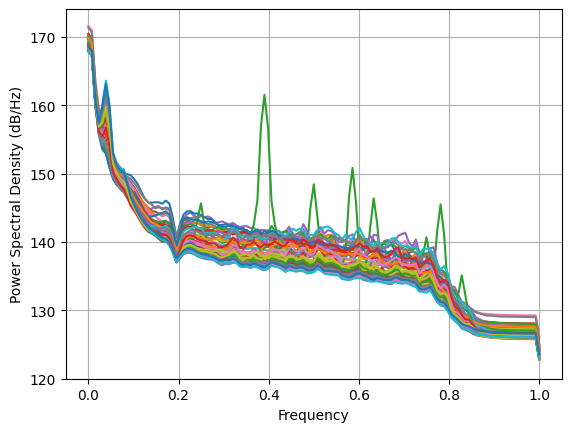

In [51]:
for i in df.columns[3:]:
  plt.psd(df[i])

In [73]:
df_new = df

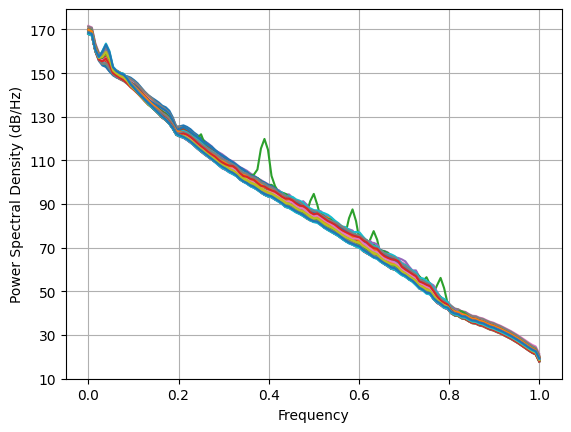

In [74]:
import numpy as np
from scipy.signal import butter,filtfilt

T = 5.0         
fs = 30.0       
cutoff = 2      
nyq = 0.5 * fs  
order = 2       
n = int(T * fs) 

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y



for i in df.columns[3:]:

  data = df[i]

  y = butter_lowpass_filter(data, cutoff, fs, order)

  df_new[i] = y

  plt.psd(y)

##Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test, y_train,y_test = train_test_split((df_new.iloc[:,3:]), df.iloc[:,1], train_size=0.8, random_state=123)

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Dimensionality Reduction

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=None)

In [81]:
pca.fit(X_train)

PCA()

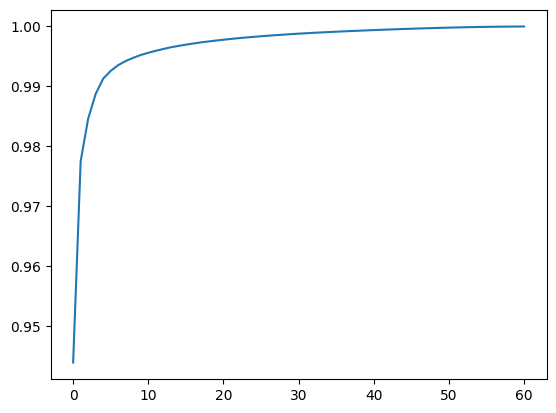

In [82]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [83]:
pca = PCA(n_components = 10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca =  pca.transform(X_test)

In [84]:
X_train_pca.shape, X_test_pca.shape

((120624, 10), (30156, 10))

#------------------------------------------------------- Rest vs Movement -------------------------------------------------------

In [85]:
y_train_rvm = y_train.map(lambda x:0 if(x==7) else 1)
y_test_rvm = y_test.map(lambda x:0 if(x==7) else 1)

##Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr_rvm = LogisticRegression()

In [88]:
lr_rvm.fit(X_train, y_train_rvm)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred_rvm_lr = lr_rvm.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rvm, y_pred_rvm_lr)

0.859132510943096

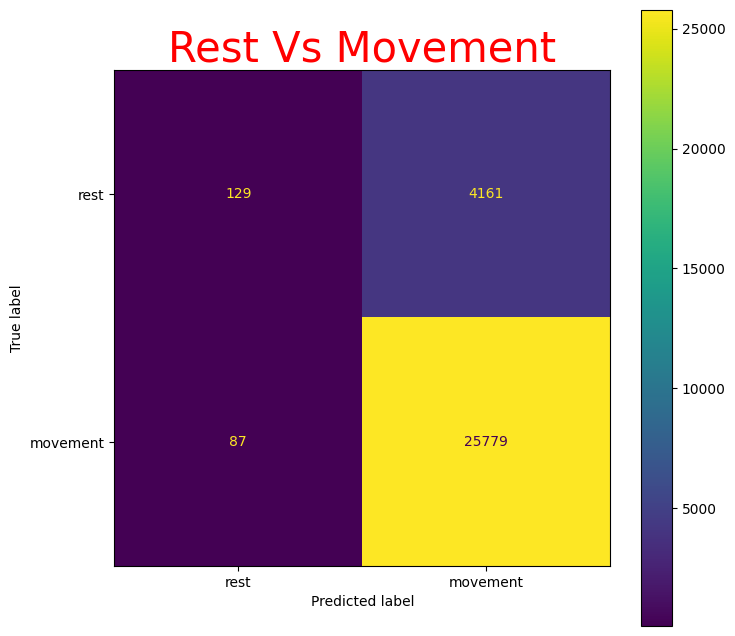

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_rvm, y_pred_rvm_lr)
labels = ['rest', 'movement']

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Rest Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

##KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn_rvm = KNeighborsClassifier(10)

In [94]:
knn_rvm.fit(X_train, y_train_rvm)

KNeighborsClassifier(n_neighbors=10)

In [95]:
y_pred_rvm_knn = knn_rvm.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rvm, y_pred_rvm_knn)

0.9427642923464651

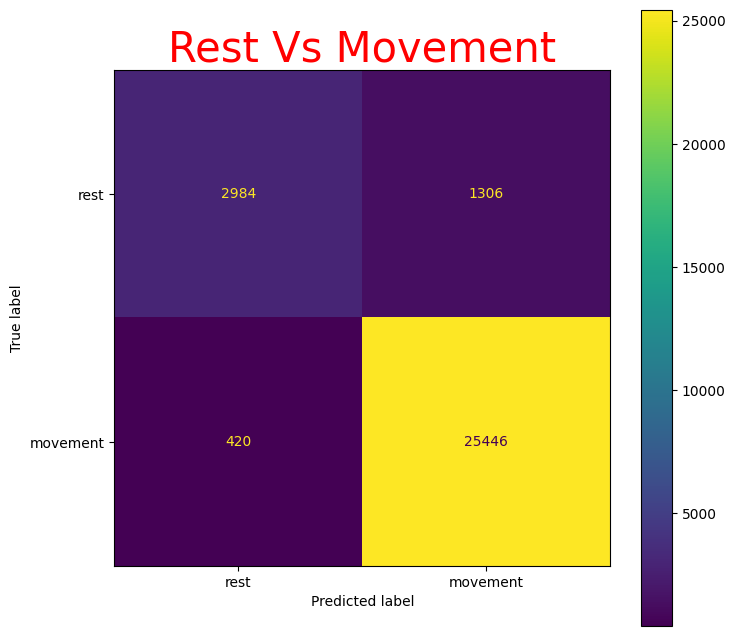

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_rvm, y_pred_rvm_knn)
labels = ['rest', 'movement']

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Rest Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
X = sc.fit_transform(df.iloc[:,3:])
y = df.iloc[:,1].map(lambda x:1 if(x==7) else 0)

In [100]:
cross_val_score(knn_rvm, X, y , cv=10)

array([0.8292877 , 0.83154264, 0.83678207, 0.82477782, 0.82676748,
       0.82849184, 0.82842552, 0.82723173, 0.82796127, 0.82908874])

In [101]:
acc_vals = {}
acc_cross_vals_score = {}
for i in range(5,20):
  knn_rvm = KNeighborsClassifier(i)
  knn_rvm.fit(X_train, y_train_rvm)
  y_pred = knn_rvm.predict(X_test)
  acc_vals[i] = accuracy_score(y_test_rvm, y_pred_rvm_knn)
  acc_cross_vals_score[i] = cross_val_score(knn_rvm, X, y , cv=3)

In [102]:
max(acc_vals.values())*100

94.27642923464651

In [103]:
from statistics import mean
for k,v in acc_cross_vals_score.items():
  print(k, ":", mean(v)*100)

5 : 77.77225096166602
6 : 80.64133174161029
7 : 79.28770393951451
8 : 81.39541053190078
9 : 80.35283194057567
10 : 81.97241013397003
11 : 81.1858336649423
12 : 82.42140867489057
13 : 81.82517575275236
14 : 82.78286244860061
15 : 82.29738692134235
16 : 83.07932086483618
17 : 82.69863377105717
18 : 83.32670115399921
19 : 82.99111287969227


##Random Forrest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc_rvm = RandomForestClassifier()

In [106]:
rfc_rvm.fit(X_train, y_train_rvm)

RandomForestClassifier()

In [107]:
y_pred_mvm_rfc = rfc_rvm.predict(X_test)

In [108]:
accuracy_score(y_test_rvm, y_pred_mvm_rfc)

0.9229672370340894

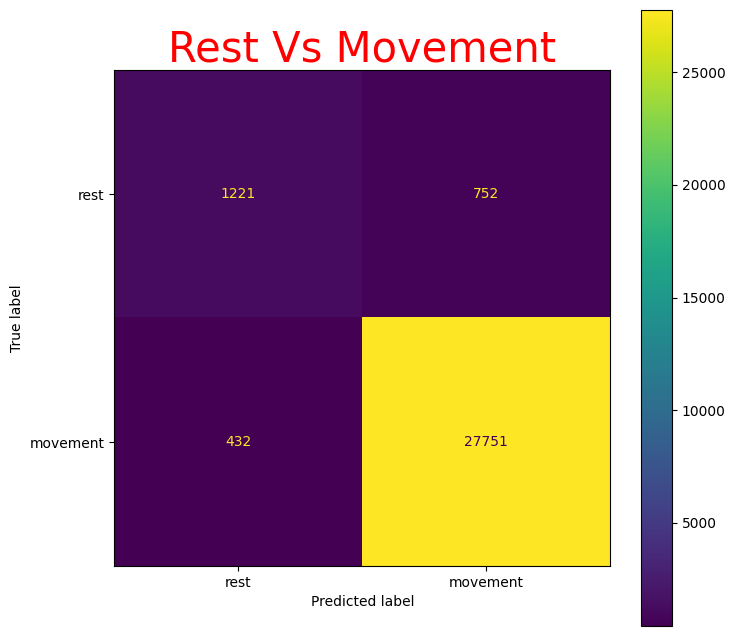

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred_mvm_rfc, y_pred)
labels = ['rest', 'movement']

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Rest Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

#---------------------------------------------------- Movement vs Movement ------------------------------------------------

In [110]:
X_train_mvm,X_test_mvm, y_train_mvm,y_test_mvm = train_test_split(df[df["condition"]<7].iloc[:,3:], df[df["condition"]<7].iloc[:,1], test_size=0.25, random_state=213)

In [111]:
sc2 = StandardScaler()

X_train_mvm = sc2.fit_transform(X_train_mvm)
X_test_mvm = sc2.transform(X_test_mvm)

In [112]:
y_train_mvm = y_train_mvm.map(lambda x:x-1)
y_test_mvm = y_test_mvm.map(lambda x:x-1)

##KNN

In [113]:
knn_mvm = KNeighborsClassifier()
knn_mvm.fit(X_train_mvm, y_train_mvm)

KNeighborsClassifier()

In [114]:
y_pred_mvm = knn_mvm.predict(X_test_mvm)

In [115]:
accuracy_score(y_test_mvm, y_pred_mvm)

0.8704735376044568

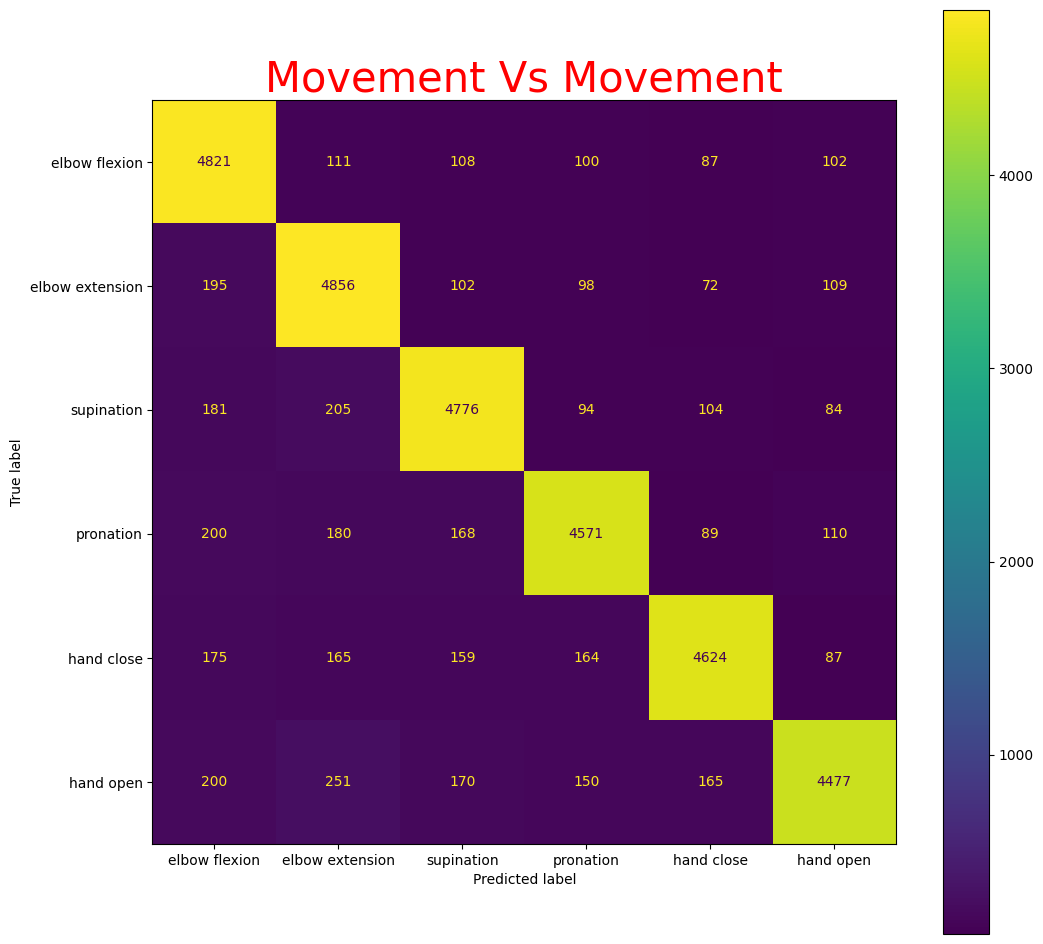

In [116]:
cm = confusion_matrix(y_test_mvm,y_pred_mvm)
labels = ['elbow flexion', 'elbow extension', 'supination', 'pronation', 'hand close', 'hand open']

fig, ax = plt.subplots(figsize=(12, 12))
plt.title("Movement Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

##Random Forrest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rfc_mvm = RandomForestClassifier(50)

In [119]:
rfc_mvm.fit(X_train_mvm, y_train_mvm)

RandomForestClassifier(n_estimators=50)

In [120]:
y_pred_mvm_rfc = rfc_mvm.predict(X_test_mvm)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_mvm, y_pred_mvm_rfc)

0.8727329000309502

In [122]:
scores={}
for i in range(200,401,20):
  rfc_mvm = RandomForestClassifier(i)
  rfc_mvm.fit(X_train_mvm, y_train_mvm)
  y_pred_mvm_rfc = rfc_mvm.predict(X_test_mvm)
  scores[i] = accuracy_score(y_test_mvm, y_pred_mvm_rfc)*100
  print(i, " : ", "%.2f"%(accuracy_score(y_test_mvm, y_pred_mvm_rfc)*100))

200  :  90.86
220  :  91.09
240  :  91.15
260  :  91.09
280  :  91.35
300  :  91.26
320  :  91.44
340  :  91.41
360  :  91.47
380  :  91.47
400  :  91.64


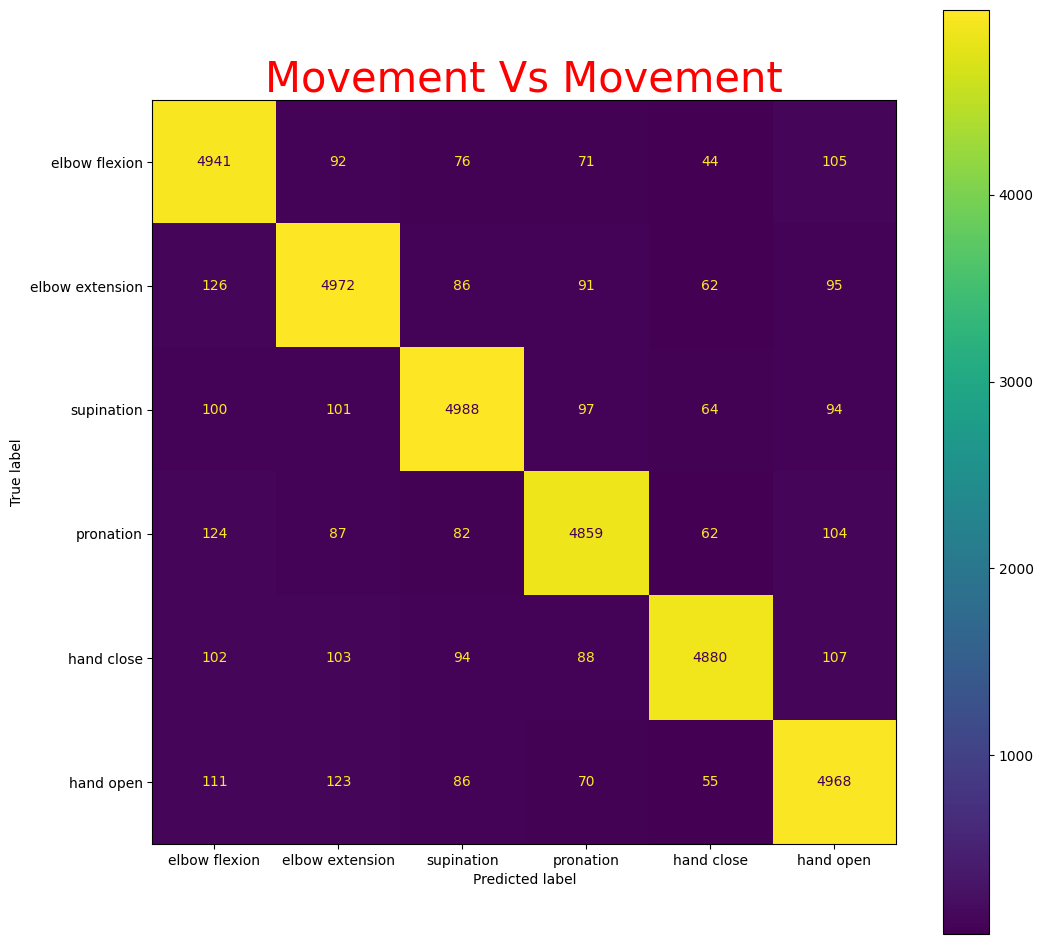

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_mvm,y_pred_mvm_rfc)
labels = ['elbow flexion', 'elbow extension', 'supination', 'pronation', 'hand close', 'hand open']

fig, ax = plt.subplots(figsize=(12, 12))
plt.title("Movement Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)